# Train with OneHot Encoder

In [223]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.patheffects as path_effects
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import sklearn.metrics as metrics
import seaborn as sns
import matplotlib.patheffects as path_effects
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder,OneHotEncoder,MinMaxScaler
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score,classification_report,roc_auc_score,roc_curve, auc
import time
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.inspection import permutation_importance
import time
#data = pd.read_csv('/content/drive/Shareddrives/ML and Data Science /RDS Y2S3/BankChurners.csv')#read csv file

data = pd.read_csv('C:/Users/weisi/Downloads/BankChurners.csv')
data.drop(['CLIENTNUM','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1, inplace=True)



In [224]:
data2 = data
y = data2[['Attrition_Flag']]
x = data.drop(columns=["Attrition_Flag"], axis = 1)
x_ohc = data2.drop(columns=["Attrition_Flag"], axis = 1)

from sklearn.preprocessing import OneHotEncoder

num_cols = data._get_numeric_data().columns
float_columns = [x for x in data.columns if x in data.select_dtypes('number')]
skew_columns = (data[float_columns]
                .skew()
                .sort_values(ascending=False))
##print (skew_columns)
log_columns = skew_columns.loc[skew_columns > 0.75]

for col in log_columns.index.tolist():
    x_ohc[col] = np.log1p(x[col])

categorical_data = ['Gender','Income_Category','Education_Level','Marital_Status','Card_Category']
x_ohc[categorical_data]

def oneHot_targets(X_categorical):
    ohc = OneHotEncoder()
    le = LabelEncoder()
    data_ohc = X_categorical.copy()
    for col in X_categorical.columns:
        if col in (x_ohc[categorical_data]):
            dat = le.fit_transform(X_categorical[col]).astype(np.int)
            data_ohc = data_ohc.drop(col, axis=1)
            new_dat = ohc.fit_transform(dat.reshape(-1,1))
            n_cols = new_dat.shape[1]
            col_names = ['_'.join([col, str(x)]) for x in range(n_cols)]
            # Create the new dataframe
            new_df = pd.DataFrame(new_dat.toarray(), 
                                  index=data_ohc.index, 
                                  columns=col_names)

        # Append the new data to the dataframe
            data_ohc = pd.concat([data_ohc, new_df], axis=1)

    return data_ohc

x_ohc = oneHot_targets(x_ohc)

x_train_ohc, x_test_ohc, y_train, y_test = train_test_split(x_ohc, y, test_size = 0.3,random_state = 0, stratify = y)


In [225]:
def prepare_inputs(x_train, x_test):
    mms = MinMaxScaler()
    x_train[num_cols] = mms.fit_transform(x_train[num_cols])
    x_test[num_cols] = mms.transform(x_test[num_cols])
    return x_train,x_test

x_train_process_ohc, x_test_process_ohc = prepare_inputs(x_train_ohc,x_test_ohc)

def prepare_targets(y_train, y_test):
    labelencoder = LabelEncoder()
    labelencoder.fit(y_train)
    y_train_enc = labelencoder.transform(y_train)
    y_test_enc = labelencoder.transform(y_test)
    return y_train_enc, y_test_enc

y_train, y_test = prepare_targets(y_train,y_test)

C:\Users\weisi\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\weisi\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\weisi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

# Dirty Train Model

## Logistic Regression

Training time: 0.12765836715698242s
Accuracy score: 0.912
Precision score: 0.920
Recall score: 0.980
F1 score: 0.949
Training Accuracy:  0.9118227990970654
Testing Accuracy:  0.9118130964132939
              precision    recall  f1-score   support

       churn       0.84      0.56      0.67       488
   not churn       0.92      0.98      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.88      0.77      0.81      3039
weighted avg       0.91      0.91      0.90      3039



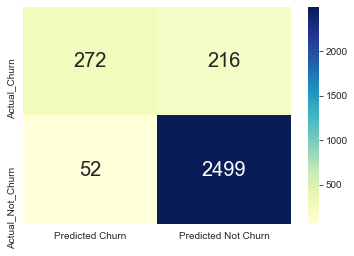

In [226]:
##LR
acscore = []
acprecision = []
acrecall = []
acF1 = []
acTrainingTime = []

def model_training(classifier,x_train,x_test):
    start = time.time()
    classifier.fit(x_train, y_train)
    stop = time.time()
    trainingTime = stop - start
    print(f"Training time: {trainingTime}s")

    # Predicting the test set
    y_pred = classifier.predict(x_test)

    # Making the confusion matrix and calculating accuracy score
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    acscore.append(ac)
    acprecision.append(precision)
    acrecall.append(recall)
    acF1.append(f1)
    acTrainingTime.append(trainingTime)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
                annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Training Accuracy: ',classifier.score(x_train, y_train))
    print('Testing Accuracy: ',classifier.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))

    return classifier.fit(x_train, y_train)

from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(max_iter=10000)
LRModel = model_training(LRclassifier,x_train_process_ohc,x_test_process_ohc)

In [227]:
def roc_curve(fpr,tpr,roc_auc):
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
def model_roc_curve(classifier,x_train,x_test):
    classifier.fit(x_train, y_train)
    clas = classifier
    x = x_test
    predProb = clas.predict_proba(x_test)
    preds = predProb[:,1]
    fpr, tpr,threshold = metrics.roc_curve(y_test, preds)
    roc_auc = auc(fpr, tpr)
    roc_curve(fpr,tpr,roc_auc)    

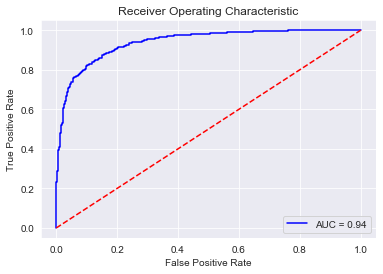

In [228]:
model_roc_curve(LRclassifier,x_train_process_ohc,x_test_process_ohc)

## Gaussian Naive Bayes

Training time: 0.011138200759887695s
Accuracy score: 0.883
Precision score: 0.926
Recall score: 0.935
F1 score: 0.930
Training Accuracy:  0.8771162528216704
Testing Accuracy:  0.8825271470878578
              precision    recall  f1-score   support

       churn       0.64      0.61      0.62       488
   not churn       0.93      0.94      0.93      2551

    accuracy                           0.88      3039
   macro avg       0.78      0.77      0.78      3039
weighted avg       0.88      0.88      0.88      3039



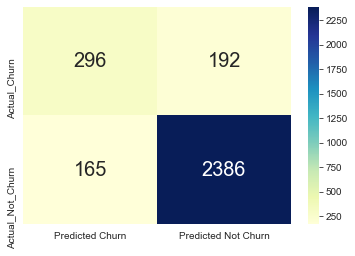

In [229]:
# Predicting the test set
#GNB
#from sklearn.naive_bayes import GaussianNB

GNBclassifier = GaussianNB()
GNBModel = model_training(GNBclassifier,x_train_process_ohc,x_test_process_ohc)

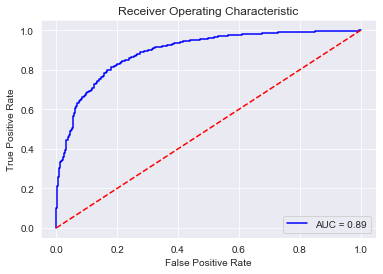

In [230]:
model_roc_curve(GNBclassifier,x_train_process_ohc,x_test_process_ohc)

## Support Vector Machine

Training time: 5.961043834686279s
Accuracy score: 0.907
Precision score: 0.912
Recall score: 0.984
F1 score: 0.947
Training Accuracy:  0.9209932279909706
Testing Accuracy:  0.9072063178677197
              precision    recall  f1-score   support

       churn       0.86      0.51      0.64       488
   not churn       0.91      0.98      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.89      0.75      0.79      3039
weighted avg       0.90      0.91      0.90      3039



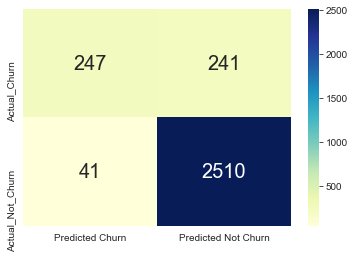

In [231]:
svc = SVC(probability=True)
svcModel = model_training(svc,x_train_process_ohc,x_test_process_ohc)

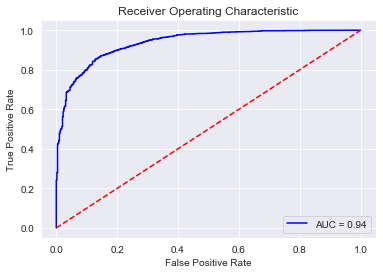

In [232]:
model_roc_curve(svc,x_train_process_ohc,x_test_process_ohc)

## KNN

Training time: 0.09105753898620605s
Accuracy score: 0.862
Precision score: 0.874
Recall score: 0.977
F1 score: 0.922
Training Accuracy:  0.8891083521444695
Testing Accuracy:  0.8621256992431721
              precision    recall  f1-score   support

       churn       0.69      0.26      0.38       488
   not churn       0.87      0.98      0.92      2551

    accuracy                           0.86      3039
   macro avg       0.78      0.62      0.65      3039
weighted avg       0.84      0.86      0.83      3039



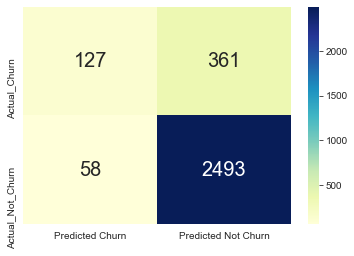

In [233]:
KNN = KNeighborsClassifier()
KnnModel= model_training(KNN,x_train_process_ohc,x_test_process_ohc)

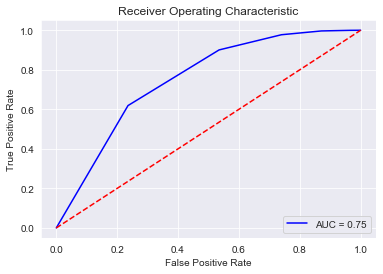

In [234]:
model_roc_curve(KNN,x_train_process_ohc,x_test_process_ohc)

## Decision Tree

Training time: 0.07779359817504883s
Accuracy score: 0.935
Precision score: 0.960
Recall score: 0.963
F1 score: 0.961
Training Accuracy:  1.0
Testing Accuracy:  0.9348469891411648
              precision    recall  f1-score   support

       churn       0.80      0.79      0.80       488
   not churn       0.96      0.96      0.96      2551

    accuracy                           0.93      3039
   macro avg       0.88      0.88      0.88      3039
weighted avg       0.93      0.93      0.93      3039



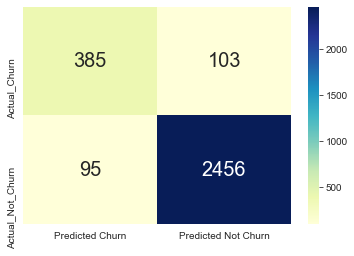

In [235]:
DTC = DecisionTreeClassifier()
DTCModel= model_training(DTC,x_train_process_ohc,x_test_process_ohc)


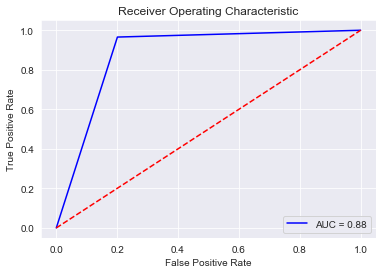

In [236]:
model_roc_curve(DTC,x_train_process_ohc,x_test_process_ohc)

## Random Forest

Training time: 0.9505143165588379s
Accuracy score: 0.961
Precision score: 0.964
Recall score: 0.989
F1 score: 0.977
Training Accuracy:  1.0
Testing Accuracy:  0.9605133267522211
              precision    recall  f1-score   support

       churn       0.94      0.81      0.87       488
   not churn       0.96      0.99      0.98      2551

    accuracy                           0.96      3039
   macro avg       0.95      0.90      0.92      3039
weighted avg       0.96      0.96      0.96      3039



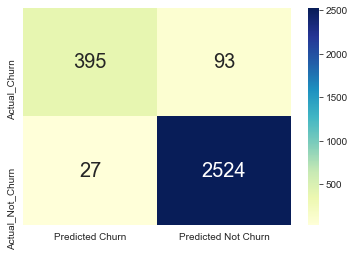

In [237]:
RFC = RandomForestClassifier()
RFCModel = model_training(RFC,x_train_process_ohc,x_test_process_ohc)

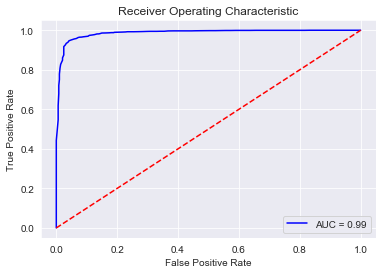

In [238]:
model_roc_curve(RFC,x_train_process_ohc,x_test_process_ohc)

## Stochastic Gradient Descent

Training time: 0.04388165473937988s
Accuracy score: 0.914
Precision score: 0.924
Recall score: 0.979
F1 score: 0.951
Training Accuracy:  0.9136568848758465
Testing Accuracy:  0.9144455412964791
              precision    recall  f1-score   support

       churn       0.84      0.58      0.68       488
   not churn       0.92      0.98      0.95      2551

    accuracy                           0.91      3039
   macro avg       0.88      0.78      0.82      3039
weighted avg       0.91      0.91      0.91      3039



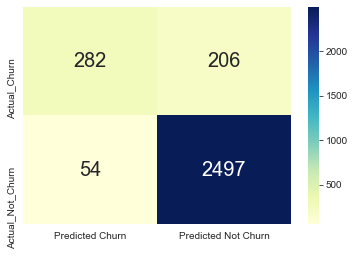

In [239]:
SGDC = SGDClassifier(shuffle=False,loss="log")
sgdModel = model_training(SGDC,x_train_process_ohc,x_test_process_ohc)

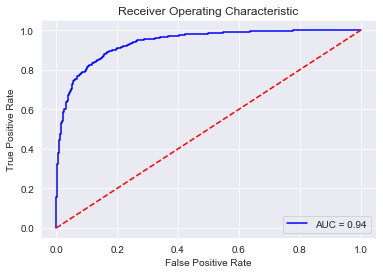

In [240]:
model_roc_curve(SGDC,x_train_process_ohc,x_test_process_ohc)

## XGBoost

Training time: 0.5386428833007812s
Accuracy score: 0.971
Precision score: 0.980
Recall score: 0.985
F1 score: 0.983
Training Accuracy:  1.0
Testing Accuracy:  0.9710431062849622
              precision    recall  f1-score   support

       churn       0.92      0.90      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94      0.95      3039
weighted avg       0.97      0.97      0.97      3039



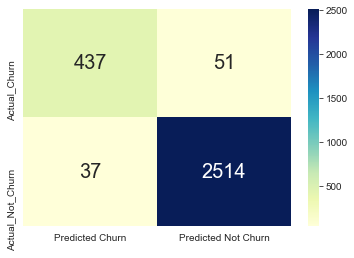

In [241]:
#xgboost

#from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
#import xgboost as xgb

m_xgb = xgb.XGBClassifier()

xgbModel = model_training(m_xgb,x_train_process_ohc,x_test_process_ohc)

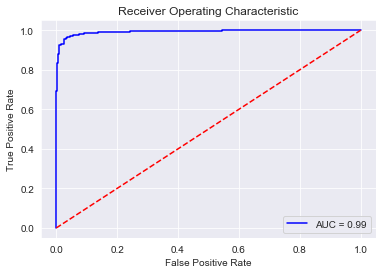

In [242]:
model_roc_curve(m_xgb,x_train_process_ohc,x_test_process_ohc)

In [243]:

# Visualising the accuracy score of each classification model

def plotEvaluationMetrics(models,y,title):
    plt.rcParams['figure.figsize']=15,8 
    sns.set_style("darkgrid")
    ax = sns.barplot(x=models, y=y, palette = "rocket", saturation =1.5)
    plt.xlabel("Classifier Models", fontsize = 20 )
    plt.ylabel("% of Accuracy", fontsize = 20)
    plt.title(title, fontsize = 20)
    plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
    plt.yticks(fontsize = 13)
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        xPlot, yPlot = p.get_xy() 
        ax.annotate(f'{height:.3%}', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
    plt.show()


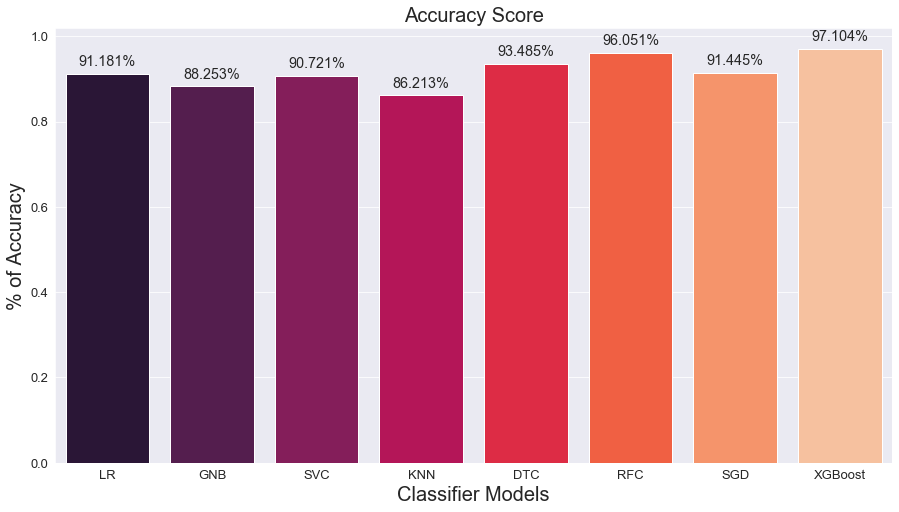

In [244]:
# every model accuracy graph
models = ['LR','GNB','SVC','KNN', 'DTC', 'RFC', 'SGD','XGBoost']
# Visualising the accuracy score of each classification model
plotEvaluationMetrics(models,acscore,"Accuracy Score")

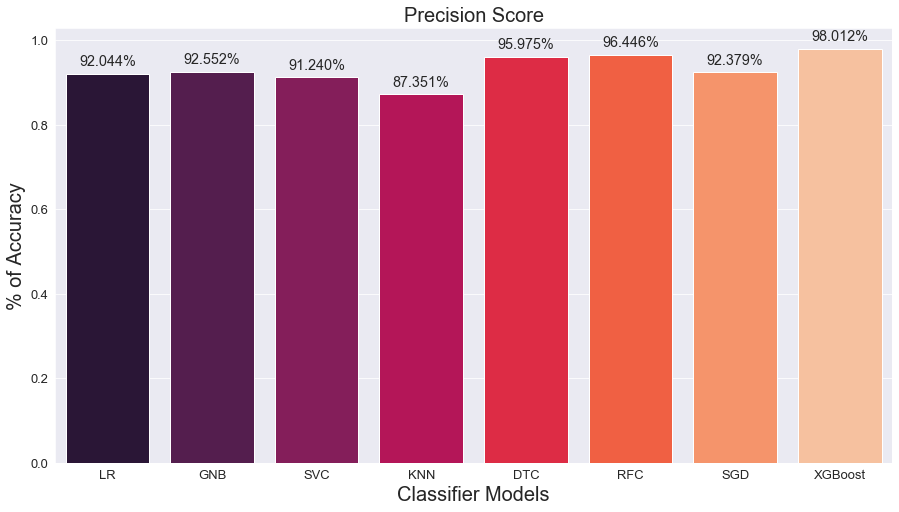

In [245]:
plotEvaluationMetrics(models,acprecision,"Precision Score")

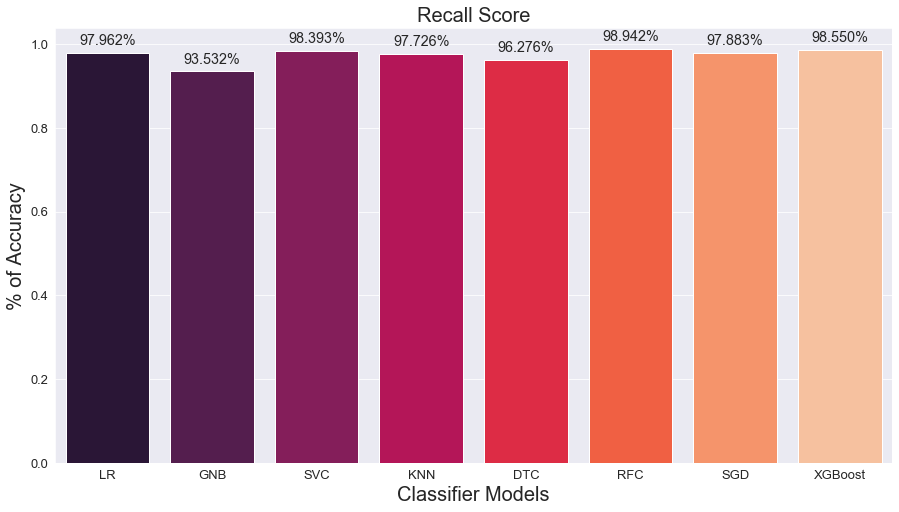

In [246]:
plotEvaluationMetrics(models,acrecall,"Recall Score")

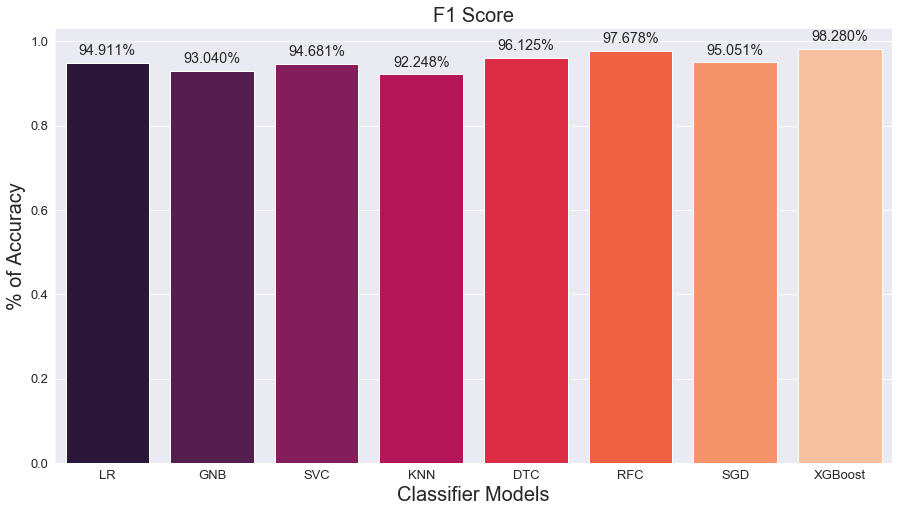

In [247]:
plotEvaluationMetrics(models,acF1,"F1 Score")

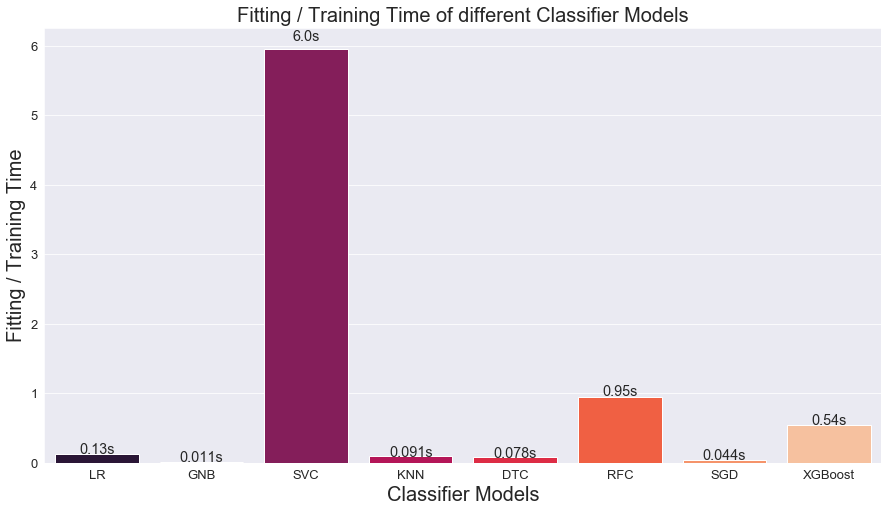

In [248]:
plt.rcParams['figure.figsize']=15,8 
sns.set_style("darkgrid")
ax = sns.barplot(x=models, y=acTrainingTime, palette = "rocket", saturation =1.5)
plt.xlabel("Classifier Models", fontsize = 20 )
plt.ylabel("Fitting / Training Time", fontsize = 20)
plt.title("Fitting / Training Time of different Classifier Models", fontsize = 20)
plt.xticks(fontsize = 13, horizontalalignment = 'center', rotation = 0)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    xPlot, yPlot = p.get_xy() 
    ax.annotate(f'{height:.2}''s', (xPlot + width/2, yPlot + height*1.02), ha='center', fontsize = 'x-large')
plt.show()

In [249]:
x_process_concat_ohc = pd.concat([x_train_process_ohc,x_test_process_ohc])

In [250]:
x_process_concat_ohc

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_0,Income_Category_1,Income_Category_2,Income_Category_3,Income_Category_4,Income_Category_5,Card_Category_0,Card_Category_1,Card_Category_2,Card_Category_3
3548,0.212766,0.8,0.534884,0.8,0.500000,0.500000,0.936394,0.303933,0.974666,0.350318,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3289,0.808511,0.0,0.534884,0.4,0.500000,0.833333,0.306632,1.000000,0.637846,0.311438,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6692,0.553191,0.2,0.697674,1.0,0.333333,0.333333,0.198696,0.628129,0.622233,0.415772,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
6360,0.425532,0.4,0.465116,0.4,0.500000,0.500000,0.143122,0.509734,0.607569,0.382114,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2041,0.148936,0.6,0.232558,1.0,0.666667,0.166667,0.181608,0.781883,0.551949,0.294189,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5750,0.234043,0.4,0.325581,0.6,0.166667,0.333333,0.134256,0.365117,0.636991,0.363059,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7577,0.659574,0.4,0.627907,0.8,0.500000,0.333333,0.039160,0.470799,0.519897,0.384029,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3458,0.510638,0.6,0.581395,1.0,0.333333,0.000000,0.604082,0.730234,0.838309,0.342638,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8907,0.404255,0.0,0.534884,0.0,0.166667,0.500000,0.813884,0.370679,0.929228,0.426269,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [251]:
y_concat =  np.concatenate((y_train, y_test), axis=None)

In [252]:
y_concat

array([1, 0, 1, ..., 1, 1, 1])

In [253]:
from sklearn.model_selection import cross_val_score

CVMean = []
CVSD = []

tupleModel = [LogisticRegression(random_state=0,max_iter=10000),GaussianNB(),SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SGDClassifier(loss="log"),xgb.XGBClassifier()]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_concat_ohc, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1

LR : [0.91263574 0.90227048 0.91012346 0.91901235 0.91506173]
GNB : [0.87956565 0.86229023 0.87703704 0.87308642 0.88641975]
SVC : [0.90621915 0.90523198 0.91506173 0.91160494 0.91555556]
KNN : [0.86377098 0.85932873 0.86320988 0.85925926 0.86419753]
DTC : [0.92793682 0.93336624 0.94617284 0.9362963  0.93975309]
RFC : [0.95459033 0.95162883 0.95901235 0.95802469 0.96395062]
SGD : [0.90424482 0.9017769  0.90617284 0.92246914 0.91308642]
XGBoost : [0.97581441 0.97087858 0.97234568 0.97530864 0.97283951]


In [254]:
from sklearn.model_selection import cross_val_score

CVMean = []
CVSD = []

tupleModel = [LogisticRegression(random_state=0,max_iter=10000),GaussianNB(),SVC(probability=True),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier(),SGDClassifier(loss="log"),xgb.XGBClassifier()]
a = 0
for model in models:
    model = cross_val_score(tupleModel[a],x_process_concat_ohc, y_concat,cv=5,scoring='accuracy')
    print(models[a],":",model)
    CVMean.append(model.mean())
    CVSD.append(model.std())
    a+=1


LR : [0.91263574 0.90227048 0.91012346 0.91901235 0.91506173]
GNB : [0.87956565 0.86229023 0.87703704 0.87308642 0.88641975]
SVC : [0.90621915 0.90523198 0.91506173 0.91160494 0.91555556]
KNN : [0.86377098 0.85932873 0.86320988 0.85925926 0.86419753]
DTC : [0.93188549 0.93385982 0.94765432 0.93975309 0.93777778]
RFC : [0.95459033 0.95508391 0.95703704 0.96246914 0.95950617]
SGD : [0.9047384  0.90227048 0.90864198 0.92098765 0.91259259]
XGBoost : [0.97581441 0.97087858 0.97234568 0.97530864 0.97283951]


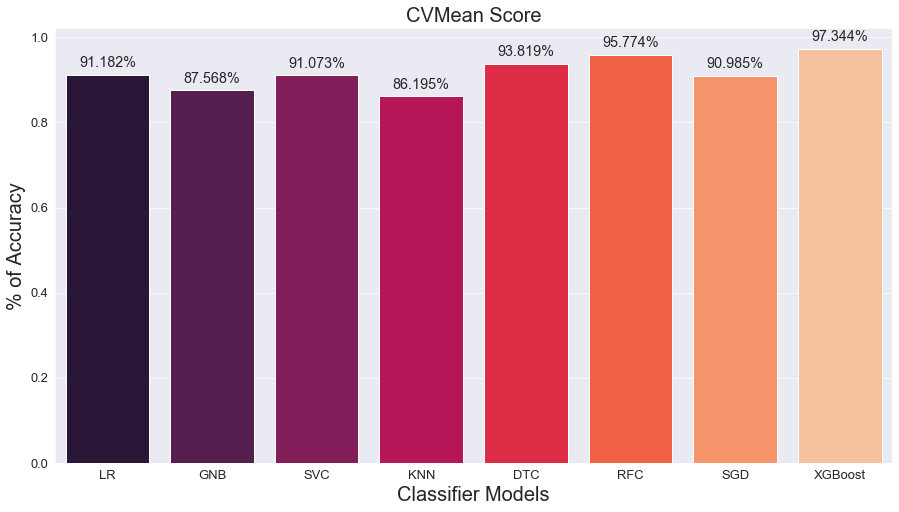

In [255]:
plotEvaluationMetrics(models,CVMean,"CVMean Score")

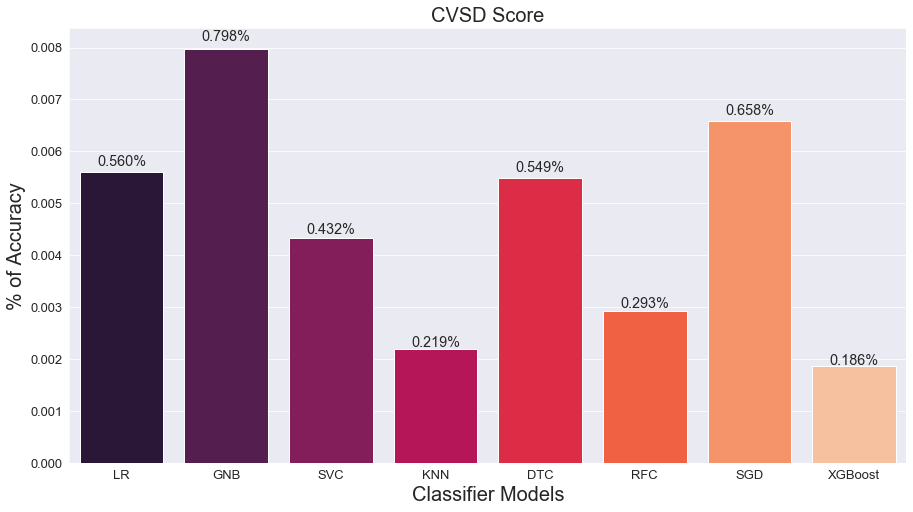

In [256]:
plotEvaluationMetrics(models,CVSD,"CVSD Score")

In [257]:
from sklearn.externals import joblib

def save_model(model, fileName):
    # Save Model to file in the current working directory
    joblib.dump(model, fileName)
    
def load_model(fileName,x_test,ytest):    
    # Load from file
    joblib_model = joblib.load(fileName)
    print(joblib_model,' ','\n')
    
    y_pred = joblib_model.predict(x_test)
    cm = confusion_matrix(y_test, y_pred)
    ac = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    sns.heatmap(cm, xticklabels=['Predicted Churn', 'Predicted Not Churn'], yticklabels=['Actual_Churn', 'Actual_Not_Churn'],
            annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    print('Accuracy score: {0:0.3f}'.format(ac))
    print('Precision score: {0:0.3f}'.format(precision))
    print('Recall score: {0:0.3f}'.format(recall))
    print('F1 score: {0:0.3f}'.format(f1))
    print('Testing Accuracy: ',joblib_model.score(x_test, y_test))
    target_names = ['churn', 'not churn']
    print(classification_report(y_test, y_pred, target_names=target_names))


In [258]:
fileName ="joblib_Model.pkl"
save_model(xgbModel,fileName)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)   

Accuracy score: 0.971
Precision score: 0.980
Recall score: 0.985
F1 score: 0.983
Testing Accuracy:  0.9710431062849622
              precision    recall  f1-score   support

       churn       0.92      0.90      0.91       488
   not churn       0.98      0.99      0.98      2551

    accuracy                           0.97      3039
   macro avg       0.95      0.94 

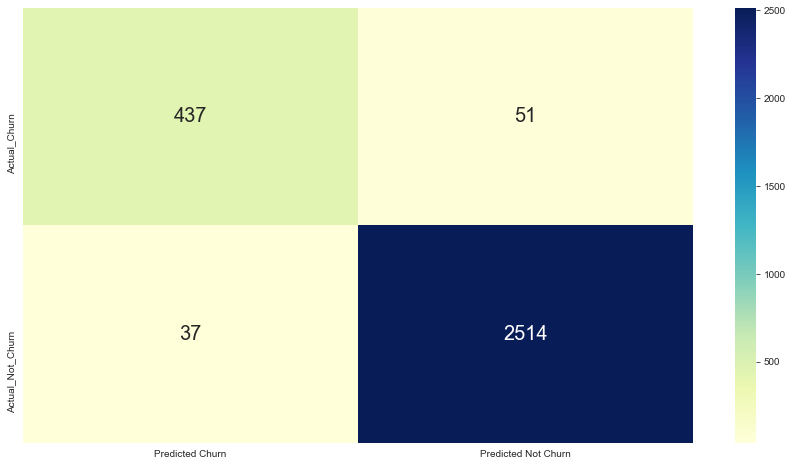

In [259]:
load_model(fileName,x_test_process_ohc,y_test)